In [62]:
# Import
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve

In [63]:
# Read csv into Dataframe
df = pd.read_csv("kidney_dataset.csv")
df.head()
#df.sample(5)

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status
0,0.788803,8.386869,102.161787,1632.649387,0,0,27.682074,106.700203,1.570370,NaN,0
1,3.413970,53.688796,50.071257,935.540516,1,0,33.122208,410.008362,3.425287,ACE Inhibitor,1
2,0.647645,7.466540,89.451831,1774.553846,1,1,55.832284,123.336925,1.123301,Diuretic,0
3,0.795508,12.516821,99.872180,2360.602980,0,0,32.391900,116.098870,3.086846,ACE Inhibitor,0
4,0.869010,19.855960,86.110182,1987.750901,0,1,66.689515,55.668760,2.174980,ARB,0


In [64]:
# Search for null values
df.isnull().any()

Creatinine          False
BUN                 False
GFR                 False
Urine_Output        False
Diabetes            False
Hypertension        False
Age                 False
Protein_in_Urine    False
Water_Intake        False
Medication           True
CKD_Status          False
dtype: bool

In [65]:
# Dig to find what the null values are
print("Dig to find what the null values are...")
print(df["Medication"].unique())
print(df.isnull().any())

# Create mask to get only the index for the null values
print("Create mask to get only the index for the null values...")
mask = df["Medication"].isnull()
index_null = df[mask]["Medication"].index

# Create a dataframe source copy to apply the changes 
df_copy = df.copy()

# Set the "None" value as text instead of the null values
print("Set the 'None' value as text instead of the null values...")
df_copy.loc[index_null, "Medication"] = "None"
print("...Done.")
print()

# Validate that there are no more "null" values
print(df_copy["Medication"].unique())
print(df_copy.isnull().any())
df_copy.head()

Dig to find what the null values are...
[nan 'ACE Inhibitor' 'Diuretic' 'ARB']
Creatinine          False
BUN                 False
GFR                 False
Urine_Output        False
Diabetes            False
Hypertension        False
Age                 False
Protein_in_Urine    False
Water_Intake        False
Medication           True
CKD_Status          False
dtype: bool
Create mask to get only the index for the null values...
Set the 'None' value as text instead of the null values...
...Done.

['None' 'ACE Inhibitor' 'Diuretic' 'ARB']
Creatinine          False
BUN                 False
GFR                 False
Urine_Output        False
Diabetes            False
Hypertension        False
Age                 False
Protein_in_Urine    False
Water_Intake        False
Medication          False
CKD_Status          False
dtype: bool


,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status
0,0.788803,8.386869,102.161787,1632.649387,0,0,27.682074,106.700203,1.570370,None,0
1,3.413970,53.688796,50.071257,935.540516,1,0,33.122208,410.008362,3.425287,ACE Inhibitor,1
2,0.647645,7.466540,89.451831,1774.553846,1,1,55.832284,123.336925,1.123301,Diuretic,0
3,0.795508,12.516821,99.872180,2360.602980,0,0,32.391900,116.098870,3.086846,ACE Inhibitor,0
4,0.869010,19.855960,86.110182,1987.750901,0,1,66.689515,55.668760,2.174980,ARB,0


In [66]:
# Set "Age" as int64
df_copy["Age"] = df_copy["Age"].astype('int64')
df_copy.head()

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status
0,0.788803,8.386869,102.161787,1632.649387,0,0,27,106.700203,1.570370,None,0
1,3.413970,53.688796,50.071257,935.540516,1,0,33,410.008362,3.425287,ACE Inhibitor,1
2,0.647645,7.466540,89.451831,1774.553846,1,1,55,123.336925,1.123301,Diuretic,0
3,0.795508,12.516821,99.872180,2360.602980,0,0,32,116.098870,3.086846,ACE Inhibitor,0
4,0.869010,19.855960,86.110182,1987.750901,0,1,66,55.668760,2.174980,ARB,0


In [67]:
# uACR calculation to see the ratio protein on creatinine
df_copy['uACR'] = df_copy['Protein_in_Urine'] / (df_copy['Creatinine'] / 1000)
df_copy.head()

,Creatinine,BUN,GFR,Urine_Output,Diabetes,Hypertension,Age,Protein_in_Urine,Water_Intake,Medication,CKD_Status,uACR
0,0.788803,8.386869,102.161787,1632.649387,0,0,27,106.700203,1.570370,None,0,135268.489337
1,3.413970,53.688796,50.071257,935.540516,1,0,33,410.008362,3.425287,ACE Inhibitor,1,120097.243337
2,0.647645,7.466540,89.451831,1774.553846,1,1,55,123.336925,1.123301,Diuretic,0,190439.106492
3,0.795508,12.516821,99.872180,2360.602980,0,0,32,116.098870,3.086846,ACE Inhibitor,0,145943.044641
4,0.869010,19.855960,86.110182,1987.750901,0,1,66,55.668760,2.174980,ARB,0,64059.971440


In [68]:
# Remove 'GFR' to avoid data leak
df_copy = df_copy.drop(axis=1, columns="GFR")

In [69]:
# Separate target variable Y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
X = df_copy.loc[:, df_copy.columns != 'CKD_Status'] # We add feature_list into our loc 
y = df_copy.loc[:,"CKD_Status"] # We set "CKD_Status" as the target variable

print("...Done.")
print()

Separating target variable from features...
...Done.



In [70]:
# Divide dataset Train set & Test set 
print("Splitting dataset into train set and test set...")
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

print("...Done.")   

Splitting dataset into train set and test set...
...Done.


In [71]:
# Encoding categorical features and standardizing numeric features
print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables
numeric_index = [X_train.columns.get_loc(col) for col in ["Creatinine", "BUN", "Urine_Output", "Age", "Protein_in_Urine", "Water_Intake", "uACR"]]
print(numeric_index)
numeric_features = numeric_index
numeric_transformer = StandardScaler()

## OneHotEncoder to encode categorical variables
categorical_index = [X_train.columns.get_loc(col) for col in ["Diabetes", "Hypertension", "Medication"]]
print(categorical_index)
categorical_features = categorical_index
categorical_transformer = OneHotEncoder()


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
            ('cat', categorical_transformer, categorical_features),    
            ('num', numeric_transformer, numeric_features)
        ]
    )

X_train_transformed = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train_transformed[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()


#### X_train BEFORE preprocessing ####
      Creatinine        BUN  Urine_Output  Diabetes  Hypertension  Age  \
2913    0.760254   7.356197   1812.804211         1             0   53   
3275    1.109978  11.630360   2412.353771         1             1   57   
775     0.873221  18.660456   1995.156153         0             0   63   
217     0.777776   7.763942   2415.789149         1             1   55   
1245    1.048714   8.213479   2301.227301         0             1   24   

      Protein_in_Urine  Water_Intake     Medication           uACR  
2913         61.701687      3.277343           None   81159.320316  
3275        116.535315      2.350423           None  104988.877337  
775          96.584766      1.186416  ACE Inhibitor  110607.517833  
217          71.611612      2.253034           None   92072.307861  
1245         50.416219      3.586090  ACE Inhibitor   48074.311073  

Encoding categorical features and standardizing numerical features...
[0, 1, 2, 5, 6, 7, 9]
[3, 4, 8]

In [72]:
# Standardizing numeric features
print("Standardizing numerical features...")
print(X_test)
print()

X_test_transformed = feature_encoder.transform(X_test)

print("...Done.")
print(X_test_transformed[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()

Standardizing numerical features...
      Creatinine        BUN  Urine_Output  Diabetes  Hypertension  Age  \
398     0.700549   8.291042   2353.675633         1             0   47   
3833    0.858684  13.847081   2441.671189         0             0   47   
4836    5.620294  50.508751   1104.643780         0             1   38   
4572    1.092196  10.024021   1845.520729         0             0   54   
636     0.904934  16.775138   2448.531492         0             0   59   
...          ...        ...           ...       ...           ...  ...   
4228    0.948499  10.244916   2398.277275         0             0   67   
2367    0.774869  17.757922   2057.807088         0             0   48   
788     0.925907  16.532034   2309.043389         0             1   80   
1452    1.080978   7.157205   1800.459633         1             0   34   
3265    0.967769  10.148054   1762.693455         0             0   52   

      Protein_in_Urine  Water_Intake     Medication           uACR  
398   

In [73]:
def prediction_and_classification_metrics(model, name, X, y, duration):
    y_pred = model.predict(X)

    return {
        "Model": name,
        "Confusion Matrix": confusion_matrix(y, y_pred),
        "Accuracy": round(accuracy_score(y, y_pred), 4),
        "Precision": round(precision_score(y, y_pred), 4),
        "Recall": round(recall_score(y, y_pred), 4), # 
        "F1-Score": round(f1_score(y, y_pred), 4),
        "Time (s)": round(duration, 3)
    }

In [74]:
models = {
    "Logistic Regression":  LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, min_samples_split=2 , min_samples_leaf=5, random_state=0),
    "Random Forest Classifier" : RandomForestClassifier(n_estimators=100, max_features="sqrt", max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=0)
}

results_train = []
results_test = []
models_test = []
for name, model in models.items():
    start = time.time()
    model.fit(X_train_transformed, y_train)
    models_test.append({
        "Model": model,
        "Name": name,
    })
    duration = time.time() - start
    print(f"--- {name} Training ---")
    results_train.append(prediction_and_classification_metrics(model, name, X_train_transformed, y_train, duration))
    print(f"--- {name} Test ---")
    results_test.append(prediction_and_classification_metrics(model, name, X_test_transformed, y_test, duration))

print("--- Training Result ---")
df_results_train = pd.DataFrame(results_train)
print(df_results_train)

print("--- Test Result ---")
df_results_test = pd.DataFrame(results_test)
print(df_results_test)

df_models_test = pd.DataFrame(models_test)


--- Logistic Regression Training ---
--- Logistic Regression Test ---
--- Decision Tree Classifier Training ---
--- Decision Tree Classifier Test ---
--- Random Forest Classifier Training ---
--- Random Forest Classifier Test ---
--- Training Result ---
                      Model         Confusion Matrix  Accuracy  Precision  \
0       Logistic Regression   [[2934, 4], [2, 1060]]    0.9985     0.9962   
1  Decision Tree Classifier  [[2881, 57], [8, 1054]]    0.9838     0.9487   
2  Random Forest Classifier   [[2938, 0], [0, 1062]]    1.0000     1.0000   

   Recall  F1-Score  Time (s)  
0  0.9981    0.9972     0.011  
1  0.9925    0.9701     0.006  
2  1.0000    1.0000     0.179  
--- Test Result ---
                      Model       Confusion Matrix  Accuracy  Precision  \
0       Logistic Regression   [[746, 1], [1, 252]]     0.998     0.9960   
1  Decision Tree Classifier  [[735, 12], [1, 252]]     0.987     0.9545   
2  Random Forest Classifier   [[742, 5], [0, 253]]     0.995    

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

def display_confusion_matrix(model):
    score_train = row["Model"].score(X_train_transformed, y_train)
    score_test = row["Model"].score(X_test_transformed, y_test)

    print("Final accuracy score on Train set: ",score_test)
    # Plot confusion matrix
    ConfusionMatrixDisplay.from_estimator(
        model,         # fitted model
        X_train_transformed, y_train,   # data + labels
        cmap=plt.cm.Blues,  # any matplotlib colormap
        normalize=None      # "true", "pred", "all", or None
    )
    plt.title("Confusion matrix on train set")
    plt.show()
    print("Accuracy-score on Test set: ", score_train)

    ConfusionMatrixDisplay.from_estimator(
        model,         # fitted model
        X_test_transformed, y_test,     # data + labels
        cmap=plt.cm.Blues,  # any matplotlib colormap
    )
    plt.title("Confusion matrix on test set")
    plt.show()
    print("Accuracy-score on test set: ", score_test)

All features names after encoding :
['cat__Diabetes_0' 'cat__Diabetes_1' 'cat__Hypertension_0'
 'cat__Hypertension_1' 'cat__Medication_ACE Inhibitor'
 'cat__Medication_ARB' 'cat__Medication_Diuretic' 'cat__Medication_None'
 'num__Creatinine' 'num__BUN' 'num__Urine_Output' 'num__Age'
 'num__Protein_in_Urine' 'num__Water_Intake' 'num__uACR']

Logistic Regression
Coefficients are:  [[-0.59454982  0.57416103 -0.58629284  0.56590405  0.00740524 -0.25046689
   0.4165373  -0.19386444  4.59964757  3.46099005 -0.35085633  1.04370603
   2.58955192  0.02464979 -1.08730162]]
Constant is:  [-3.19132491]
Model's Coefficients per feature:
                          Feature  Coefficient
8                 num__Creatinine     4.599648
9                        num__BUN     3.460990
12          num__Protein_in_Urine     2.589552
11                       num__Age     1.043706
1                 cat__Diabetes_1     0.574161
3             cat__Hypertension_1     0.565904
6        cat__Medication_Diuretic     0

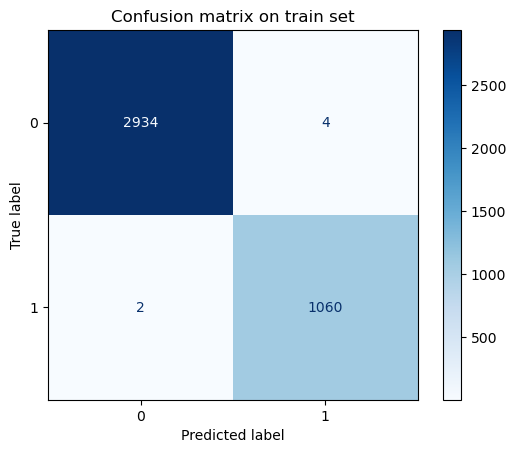

Accuracy-score on Test set:  0.9985


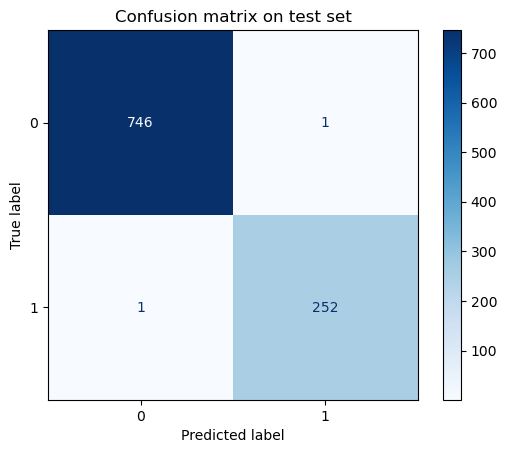

Accuracy-score on test set:  0.998


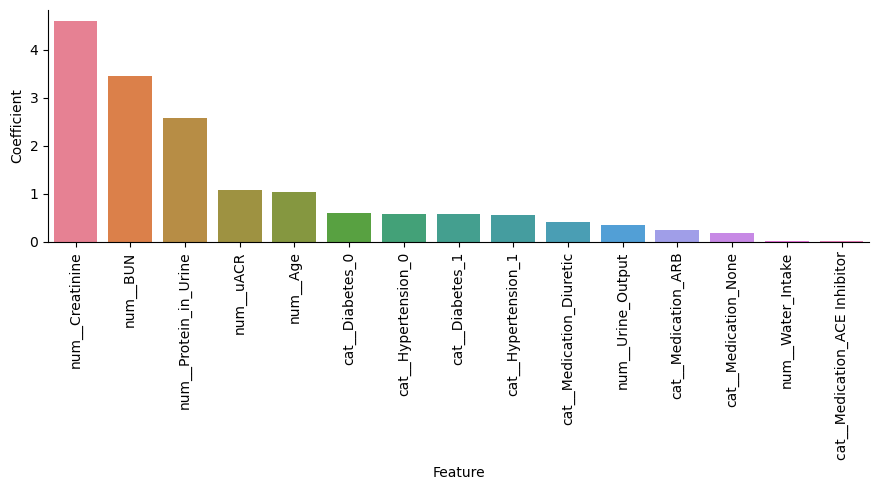

Decision Tree Classifier
Features importance Decision Tree Classifier:
                          Feature  Importance
8                 num__Creatinine         1.0
0                 cat__Diabetes_0         0.0
1                 cat__Diabetes_1         0.0
2             cat__Hypertension_0         0.0
3             cat__Hypertension_1         0.0
4   cat__Medication_ACE Inhibitor         0.0
5             cat__Medication_ARB         0.0
6        cat__Medication_Diuretic         0.0
7            cat__Medication_None         0.0
9                        num__BUN         0.0
10              num__Urine_Output         0.0
11                       num__Age         0.0
12          num__Protein_in_Urine         0.0
13              num__Water_Intake         0.0
14                      num__uACR         0.0
Final accuracy score on Train set:  0.987


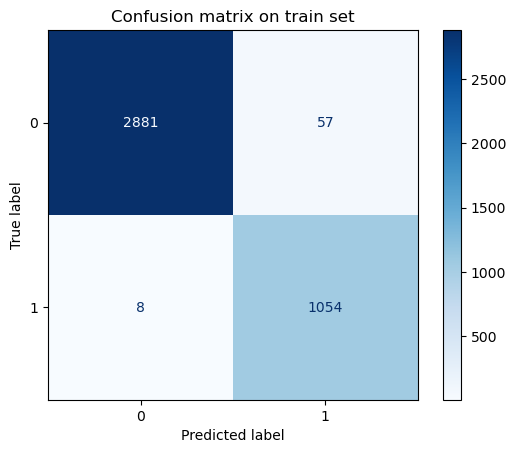

Accuracy-score on Test set:  0.98375


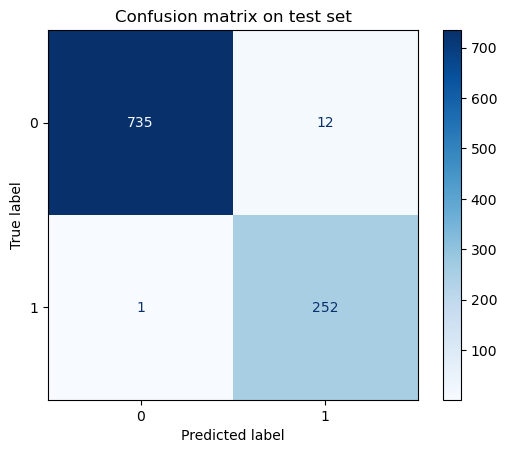

Accuracy-score on test set:  0.987


C:\Users\Admin\AppData\Local\Temp\ipykernel_34996\70882224.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',


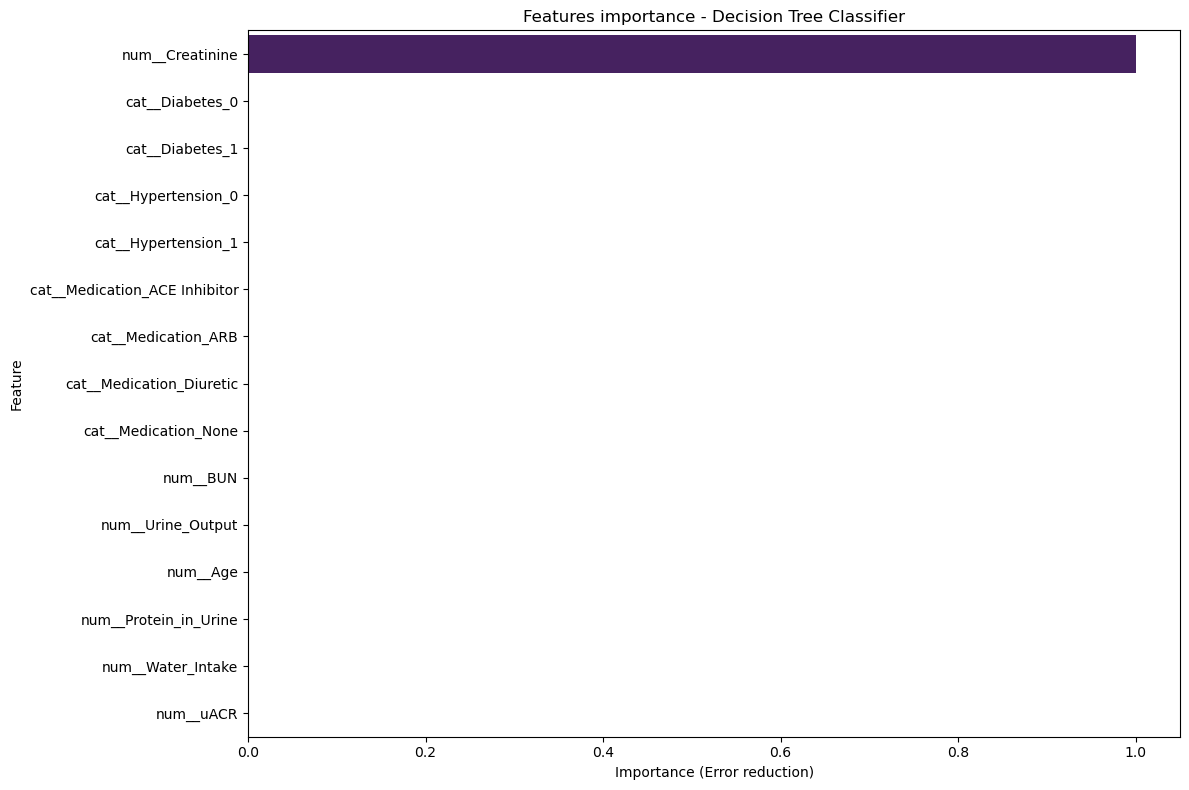

Random Forest Classifier
Features importance Random Forest Classifier:
                          Feature  Importance
9                        num__BUN    0.254863
8                 num__Creatinine    0.236432
10              num__Urine_Output    0.209309
12          num__Protein_in_Urine    0.156761
14                      num__uACR    0.129257
11                       num__Age    0.004576
13              num__Water_Intake    0.004117
7            cat__Medication_None    0.000774
2             cat__Hypertension_0    0.000717
0                 cat__Diabetes_0    0.000681
5             cat__Medication_ARB    0.000633
1                 cat__Diabetes_1    0.000631
4   cat__Medication_ACE Inhibitor    0.000518
3             cat__Hypertension_1    0.000482
6        cat__Medication_Diuretic    0.000249
Final accuracy score on Train set:  0.995


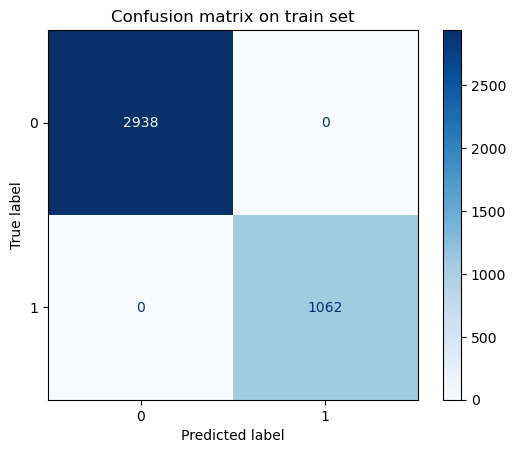

Accuracy-score on Test set:  1.0


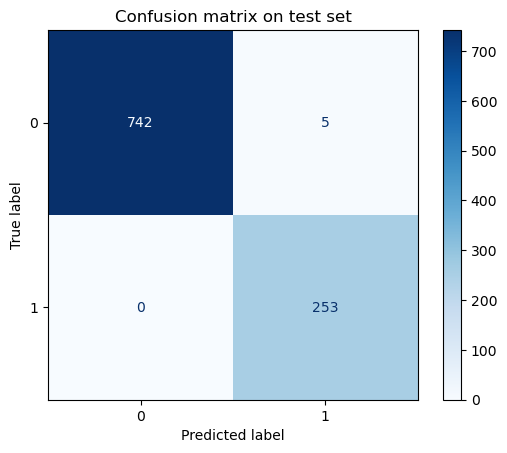

Accuracy-score on test set:  0.995


C:\Users\Admin\AppData\Local\Temp\ipykernel_34996\70882224.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',


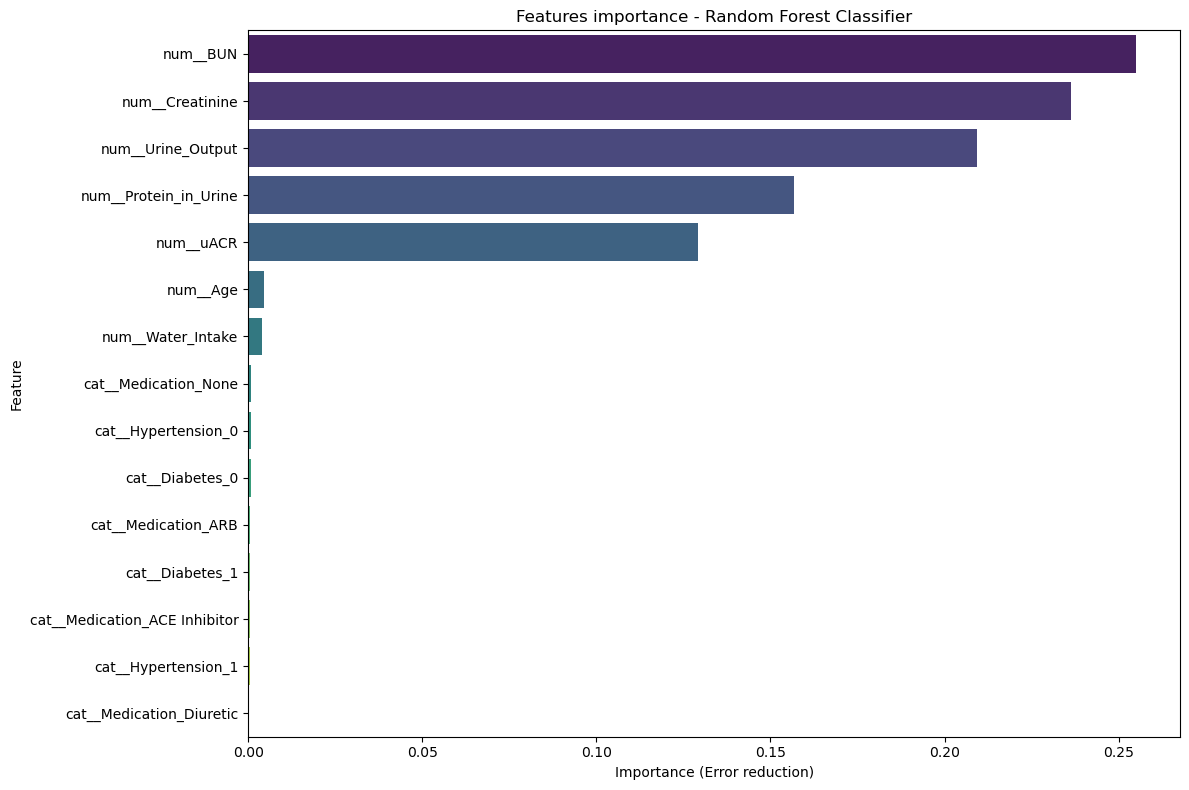

In [78]:
# Visualization Coef / Features importance based on GFR
all_column_names = feature_encoder.get_feature_names_out()
print("All features names after encoding :")
print(all_column_names)
print()

for _, row in df_models_test.iterrows():
    print(row["Name"])
    if row["Name"] == "Logistic Regression":
        print("Coefficients are: ", row["Model"].coef_)
        print("Constant is: ", row["Model"].intercept_)
        # Set DataFrame with all column names & coef associated
        coefficients_df = pd.DataFrame({
            'Feature': all_column_names,
            'Coefficient': row["Model"].coef_[0] # Get only the first row because it is binary class classification
        })
        print("Model's Coefficients per feature:")
        print(coefficients_df.sort_values(by='Coefficient', ascending=False))
        # Set coefficient to absolute values to rank features
        coefficients_df["Coefficient"] = coefficients_df["Coefficient"].abs()

        display_confusion_matrix(row["Model"])

        # Visualize ranked features using seaborn
        sns.catplot(x="Feature",
                    y="Coefficient",
                    data=coefficients_df.sort_values(by="Coefficient", ascending=False),
                    kind="bar",
                    aspect=16/9, # Resize graph
                    hue="Feature",
        )
        plt.xticks(rotation=90)
        plt.tight_layout() # Adjust visibility
        plt.show()
    else:
        # Importance features from tree / forest
        importances = row["Model"].feature_importances_
        # Set DataFrame with all column names & features importance associated
        feature_importance_df = pd.DataFrame({
            'Feature': all_column_names,
            'Importance': importances
        })
        # Sort by features importance
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        print(f"Features importance {row["Name"]}:")
        print(feature_importance_df)

        display_confusion_matrix(row["Model"])

        # Visualize ranked features using matplot
        plt.figure(figsize=(12, 8)) # 
        sns.barplot(x='Importance',
                    y='Feature',
                    data=feature_importance_df,
                    orient='h', 
                    palette='viridis')
        plt.title(f'Features importance - {row["Name"]}')
        plt.xlabel('Importance (Error reduction)')
        plt.ylabel('Feature')
        plt.tight_layout() # Adjust visibility
        plt.show()
    


### Graph 1: Logistic Regression Coefficients

 *   **What it tells us:** This graph shows the weight each feature has on the final decision. A large positive bar `Creatinine`, `BUN`) means that an increase in that feature's value strongly pushes the model to predict "Yes, the patient has CKD."
 *   **The Story:** This model identifies `num__Creatinine` as the single most powerful indicator of disease. `num__BUN` and `num__Protein_in_Urine` are also significant risk factors. It tells a clear, linear story: the high these values, the higher the risk.
### Graph 2: Decision Tree Classifier Feature Importance

*   **What it tells us:** This graph shows which feature the single Decision Tree found most useful for splitting the data to make correct predictions.
*   **The Story:** The story here is extremely simple and also a cause for concern. The model has an almost total reliance on `num__Creatinine`, giving it an importance score of nearly 100%. All other features are effectively ignored. This indicates that the model is "greedy" and has found a simple shortcut. While Creatinine is important, relying on it alone makes the model brittle and likely to perform poorly on new data that doesn't follow this exact pattern.
### Graph 3: Random Forest Classifier Feature Importance

*   **What it tells us:** This graph averages the importance of features across all 100 trees in the forest, givin a more stable and balanced perspective.
*   **The Story:** This is the most medically realistic and trustworthy view. The model agrees that blood markers are critical, but it doesn't rely on just one. It identifies a "committee" of top predictors:
    1.  `num__BUN`
    2.  `num__Creatinine`
    3.  `num__Urine_Output`
    4.  `num__Protein_in_Urine`
    5.  `num__uACR` (your engineered feature)

### Final thoughts
The best model between the Logistic Regression, Decision Tree Classifier and Random Forest Classifier based on pure performance is ranked in the following order :
1. Logistic Regression
2. Random Forest Classifier
3. Decision Tree Classifier

**However**, like for the regression analysis, the Random Forest Classifier outstand for two points :
* Critical role of the "Recall" in medical diagnosis : In a medical context, you want to minimize false negatives at all costs. It is far better to mistakenly tell a healthy person they might have an issue (a false positive, which leads to more testing) than to tell a sick person they are healthy (a false negative, which can lead to delayed treatment and severe consequences).
* Feature Importance and Model Trust: Like for the regression analysis, the Random Forest Classifier Features importance is more relevant than the 2 other models.

Therefore, the Random Forest Classifier is not the best model in term of performance, nor accuracy, but it is the best model in term of interpretation and robustness, which could make it the choosen one our medical use-case.